In [1]:
import librosa
#librosaライブラリのインポート（初めての人はインストール必要かもです）

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC

In [3]:
svc=SVC(kernel='rbf', gamma=0.1, C=10)#モデル作成（本当はこっからkernel.gamma,cの調整が必要）

In [4]:
row_data_kimura=np.empty((0, 22050), float)
row_data_tsujita=np.empty((0, 22050), float)
#空のarrayを作成
print(type(row_data_kimura))

<class 'numpy.ndarray'>


In [5]:
for i in range(8):
    k_data, f=librosa.load(r"data\kimura_out_a00{}.wav".format(i+2))
    t_data, f=librosa.load(r"data\tsujita_out_a00{}.wav".format(i+2))
    row_data_kimura = np.append(row_data_kimura, np.array([k_data]), axis = 0)
    row_data_tsujita = np.append(row_data_tsujita, np.array([t_data]), axis = 0)
    #2-9番目の音声データ読み込み
# print(row_data[1])
# print(row_data[1].shape)
print(type(row_data_kimura))
print(row_data_kimura.shape)
print(row_data_tsujita.shape)
row_data_kimura
# print(row_data)
#np.array(row_data)

<class 'numpy.ndarray'>
(8, 22050)
(8, 22050)


array([[ 0.0505181 ,  0.06124164,  0.02998081, ...,  0.04540941,
         0.07099586,  0.08282308],
       [ 0.05033078,  0.06823435,  0.06155987, ...,  0.03048746,
         0.04146661,  0.06406365],
       [ 0.05685863,  0.09267953,  0.08549885, ..., -0.00380863,
        -0.00777775, -0.01320163],
       ...,
       [ 0.06170412,  0.0894892 ,  0.06680319, ...,  0.05038268,
         0.05784999,  0.05136752],
       [ 0.01510118, -0.00561017, -0.03052215, ..., -0.0349433 ,
        -0.0310175 , -0.02873879],
       [-0.01587843, -0.01633452,  0.00119146, ...,  0.05447901,
         0.06039618,  0.07281134]])

In [6]:
#実行は1回だけ！
for i in range(8,24):
    k_data,f=librosa.load(r"data\kimura_out_a0{}.wav".format(i+2))
    t_data,f=librosa.load(r"data\tsujita_out_a0{}.wav".format(i+2))
    row_data_kimura = np.append(row_data_kimura, np.array([k_data]), axis = 0)
    row_data_tsujita = np.append(row_data_tsujita, np.array([t_data]), axis = 0)
    #10-25番目の音声データ読み込み
print(type(f))
print(row_data_kimura.shape)
print(f)

<class 'int'>
(24, 22050)
22050


In [13]:
mfccs_k_2=librosa.feature.mfcc(row_data_kimura[0])
mfccs_t_2=librosa.feature.mfcc(row_data_tsujita[0])
print(mfccs_k_2.shape)
print(mfccs_t_2.shape)
mfccs_k = mfccs_k_2[None,:,:]
mfccs_t = mfccs_t_2[None,:,:]
#mfccを入れるための空のarrayを作成(3次元に変換)
print(type(mfccs_k))
print(type(mfccs_t))
print(mfccs_k.shape)
mfccs_k

(20, 44)
(20, 44)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1, 20, 44)


array([[[-2.30658920e+02, -2.67069061e+02, -3.37346100e+02,
         -3.36678467e+02, -3.36409454e+02, -3.39517639e+02,
         -3.52573120e+02, -3.63416107e+02, -3.65939056e+02,
         -3.64901672e+02, -3.56205414e+02, -3.54031219e+02,
         -3.58456696e+02, -3.68361633e+02, -3.70540100e+02,
         -3.74253998e+02, -3.72421783e+02, -3.71986542e+02,
         -3.68098572e+02, -3.58085968e+02, -3.62752319e+02,
         -3.74144043e+02, -3.67669006e+02, -3.62487518e+02,
         -3.59649017e+02, -3.57573944e+02, -3.49279877e+02,
         -3.47542664e+02, -3.49632446e+02, -3.54925873e+02,
         -3.52151978e+02, -3.48077972e+02, -3.38125153e+02,
         -3.42036285e+02, -3.55545776e+02, -3.46164886e+02,
         -3.43598480e+02, -3.52140778e+02, -3.56530823e+02,
         -3.60139557e+02, -3.53068237e+02, -3.52740143e+02,
         -3.18809570e+02, -2.83220459e+02],
        [ 1.51718506e+02,  1.43675903e+02,  1.16918533e+02,
          1.21353607e+02,  1.21807556e+02,  1.21117393e+

In [14]:
for i in range(23):
    k_mfcc_2=librosa.feature.mfcc(row_data_kimura[i])
    t_mfcc_2=librosa.feature.mfcc(row_data_tsujita[i])
    k_mfcc=k_mfcc_2[None,:,:]
    t_mfcc=t_mfcc_2[None,:,:]
    #print(my_mfcc.shape)
    mfccs_k = np.concatenate([mfccs_k, k_mfcc], axis=0)
    mfccs_t = np.concatenate([mfccs_t, t_mfcc], axis=0)
    print(mfccs_k.shape)
    print(mfccs_t.shape)
# #23個のmfccを入れる。
# mfcc = librosa.feature.mfcc(data[0])
# print(type(mfcc))
# mfcc.shape

(2, 20, 44)
(2, 20, 44)
(3, 20, 44)
(3, 20, 44)
(4, 20, 44)
(4, 20, 44)
(5, 20, 44)
(5, 20, 44)
(6, 20, 44)
(6, 20, 44)
(7, 20, 44)
(7, 20, 44)
(8, 20, 44)
(8, 20, 44)
(9, 20, 44)
(9, 20, 44)
(10, 20, 44)
(10, 20, 44)
(11, 20, 44)
(11, 20, 44)
(12, 20, 44)
(12, 20, 44)
(13, 20, 44)
(13, 20, 44)
(14, 20, 44)
(14, 20, 44)
(15, 20, 44)
(15, 20, 44)
(16, 20, 44)
(16, 20, 44)
(17, 20, 44)
(17, 20, 44)
(18, 20, 44)
(18, 20, 44)
(19, 20, 44)
(19, 20, 44)
(20, 20, 44)
(20, 20, 44)
(21, 20, 44)
(21, 20, 44)
(22, 20, 44)
(22, 20, 44)
(23, 20, 44)
(23, 20, 44)
(24, 20, 44)
(24, 20, 44)


In [29]:
y_train = np.ones(40)
y_test = np.ones(8)

In [31]:
for i in range(20):
    y_train[i]=0
# 0:kimura, 1:tsujita

for i in range(4):
    y_test[i]=0

In [18]:
import tensorflow as tf
import keras
from keras.models import Sequential

from keras.layers import Dense, Activation, Flatten

from keras.optimizers import SGD

from keras.utils import np_utils

Using TensorFlow backend.


In [26]:
mfccs_k_train = mfccs_k[:20,:,:]
mfccs_t_train = mfccs_t[:20,:,:]
mfccs_k_test = mfccs_k[20:,:,:]
mfccs_t_test = mfccs_t[20:,:,:]
print(mfccs_k_train.shape)
print(mfccs_k_test.shape)

(20, 20, 44)
(4, 20, 44)


In [33]:
mfccs_train = np.concatenate([mfccs_k_train, mfccs_t_train], axis=0)
mfccs_test = np.concatenate([mfccs_k_test, mfccs_t_test], axis=0)

In [34]:
print(mfccs_train.shape)

(40, 20, 44)


In [36]:
mfccs_train_max = mfccs_train.max()

In [37]:
mfccs_test_max = mfccs_test.max()

In [38]:
mfccs_max = max(mfccs_train_max, mfccs_test_max)

In [40]:
#正規化
mfccs_train /= mfccs_max
mfccs_test /= mfccs_max

In [ ]:
# 以上でデータの完成！

In [ ]:
#ニューラルネットワークにぶち込む

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential

from keras.layers import Dense, Activation, Flatten

from keras.optimizers import SGD

from keras.utils import np_utils

In [41]:
Y_train = np_utils.to_categorical(y_train, num_classes=2).astype('i')
Y_test = np_utils.to_categorical(y_test, num_classes=2).astype('i')

In [46]:
batch_size=100

In [47]:
n_epoch=20

In [42]:
model = Sequential()  # モデルのインスタンスを作成（モデルを作る度に作成する必要がある）
# addメソッドで層を追加していく。
# Flatten: 二次元配列を一次元配列に変換する層
# 入力層に配置しているときはinput_shapeに入力サイズを指定。
model.add(Flatten(input_shape=(20, 44)))

# Dense: 全結合（線形結合）レイヤーです。引数に出力サイズ（1次元）を指定する。
model.add(Dense(900))

# Activation: 活性化関数を定義。今回は最もポピュラーなReLU関数。他にも"sigmoid"：シグモイド関数などがある。
model.add(Activation('relu'))

# 以下同じような要領で層を重ねていく
model.add(Dense(1000))
model.add(Activation('relu'))

model.add(Dense(500))
model.add(Activation('relu'))

# 出力層：最後の線形結合レイヤーは分類するクラス数に指定。
# 活性化関数は分類なのでSoftmax関数（回帰なら恒等関数＝そのまま出力）
model.add(Dense(2))
model.add(Activation('softmax'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [43]:
# 損失関数(＝誤差関数）は分類では定番の交差エントロピー誤差（回帰ならRMSEが定番）
# 最適化手法は基本的な確率的勾配降下法(SGD)（一番ポピュラーなのはAdam　＊後述）
# 評価方法は精度（Accuracy）に指定。学習時での出力評価に使われる。

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy']) 

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [48]:
#実際に学習させる（注意：hist変数は学習終了後生成されるので中断したら参照できない）
hist = model.fit(mfccs_train,
                 Y_train,
                 epochs=n_epoch,
                 validation_data=(mfccs_test, Y_test),
                 verbose=1,
                 batch_size=batch_size)

Train on 40 samples, validate on 8 samples
Epoch 1/20
40/40 [==============================] - 0s - loss: 0.6932 - acc: 0.5000 - val_loss: 0.7239 - val_acc: 0.5000
Epoch 2/20
40/40 [==============================] - 0s - loss: 0.6927 - acc: 0.5000 - val_loss: 0.7236 - val_acc: 0.5000
Epoch 3/20
40/40 [==============================] - 0s - loss: 0.6925 - acc: 0.5000 - val_loss: 0.7234 - val_acc: 0.5000
Epoch 4/20
40/40 [==============================] - 0s - loss: 0.6924 - acc: 0.5000 - val_loss: 0.7233 - val_acc: 0.5000
Epoch 5/20
40/40 [==============================] - 0s - loss: 0.6923 - acc: 0.5000 - val_loss: 0.7232 - val_acc: 0.5000
Epoch 6/20
40/40 [==============================] - 0s - loss: 0.6922 - acc: 0.5000 - val_loss: 0.7231 - val_acc: 0.5000
Epoch 7/20
40/40 [==============================] - 0s - loss: 0.6921 - acc: 0.5000 - val_loss: 0.7230 - val_acc: 0.5000
Epoch 8/20
40/40 [==============================] - 0s - loss: 0.6921 - acc: 0.5750 - val_loss: 0.7229 - val_a

In [50]:
# 学習精度をテストデータで確認できる（学習時にvalidation_dataとして入力していたら必要ない）
loss_and_metrics = model.evaluate(mfccs_test, Y_test)
loss_and_metrics #（損失値、精度）を返す

8/8 [==============================] - 0s


[0.7223383784294128, 0.5]

In [51]:
hist.history

{'val_loss': [0.7239309549331665,
  0.7235866785049438,
  0.7234324216842651,
  0.7233006954193115,
  0.7232019305229187,
  0.7231075167655945,
  0.7230253219604492,
  0.7229472398757935,
  0.7228809595108032,
  0.7228140830993652,
  0.7227541208267212,
  0.7227008938789368,
  0.7226536273956299,
  0.7226081490516663,
  0.7225581407546997,
  0.7225111722946167,
  0.7224719524383545,
  0.7224292755126953,
  0.722383975982666,
  0.7223383784294128],
 'val_acc': [0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5],
 'loss': [0.6931741833686829,
  0.6927450299263,
  0.6925283074378967,
  0.6923946142196655,
  0.692284107208252,
  0.6922072768211365,
  0.6921324729919434,
  0.6920749545097351,
  0.6920133829116821,
  0.6919481158256531,
  0.691887617111206,
  0.6918360590934753,
  0.691794216632843,
  0.6917451620101929,
  0.6916956901550293,
  0.6916645169258118,
  0.6916362643241882,
  0.6916114091873169

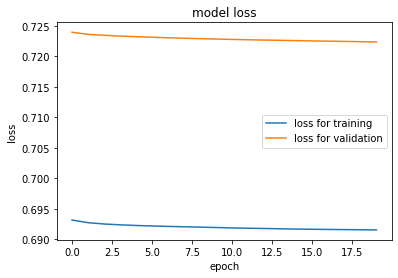

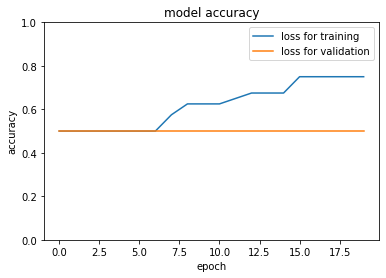

In [52]:
# プロットして損失値と精度の推移を視覚化するのは非常に重要な作業なので特に理由がなければ毎度表示する。
# 過学習や学習不足が確認できる。


# 損失値(Loss)の遷移のプロット
def plot_history_loss(hist):
    
    # hist.historyに辞書型で損失値や精度が入っているので取得して表示
    plt.plot(hist.history['loss'],label="loss for training")
    plt.plot(hist.history['val_loss'],label="loss for validation")
    
    #matplotlibの細かい設定
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='best')
    
    plt.show()

    
# 精度(Accuracy)の遷移のプロット
def plot_history_acc(hist):
    plt.plot(hist.history['acc'],label="loss for training")
    plt.plot(hist.history['val_acc'],label="loss for validation")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='best')
    plt.ylim([0, 1])
    plt.show()

plot_history_loss(hist)
plot_history_acc(hist)

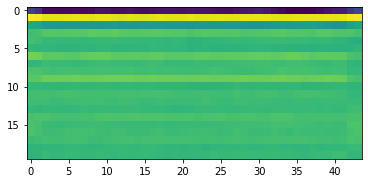

In [54]:
# testデータ内のサンプルをピックアップ
# indexを指定して任意の１秒間の音声を選択
index = 3
plt.imshow(mfccs_test[index])
plt.show()

In [55]:
# 予測を行い､答え合わせをする

# 予測はクラスの確率的表現（softmax関数より）で出てくるのでargmaxで最大の列番号を取得
pred = model.predict(mfccs_test[index].reshape(1, 20, 44)).argmax()
ans  = Y_test[index].argmax()

print('predict: ', pred)
print('answer : ', ans)

if pred == ans:
    print('正解です｡')
else:
    print('不正解です')

predict:  0
answer :  0
正解です｡


In [56]:
# 混同行列を出力
# testデータに対して行うことに注意
from sklearn.metrics import confusion_matrix as cm
result = model.predict(mfccs_test).argmax(axis=1)
cm(y_test, result)  # y_testはOne-Hot表現にする前のデータ形式に注意

array([[4, 0],
       [4, 0]], dtype=int64)

In [57]:
result

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [62]:
# 混同行列をグラフで出力する関数
def plot_cm(y_true, y_pred):
    confmat = cm(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xticks(np.arange(0, 1, 1)) # x軸の目盛りを指定
    plt.yticks(np.arange(0, 1, 1)) # y軸の目盛りを指定
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()

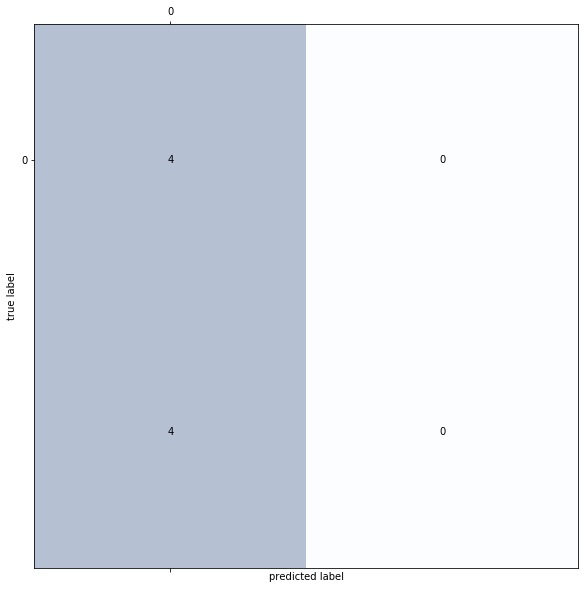

In [63]:
# 混同行列をグラフで出力
# testデータに対して行うことに注意
plot_cm(y_test, result)

In [ ]:
#全部木村さんの音声じゃ